# Evaluación Solemne 1
## "_Pronóstico del Clima en Australia_"

###  - Asignatura : Minería de Datos.
####  - Sección : MDY001D.
####  - Docente : Luis Díaz.

#### _Integrantes :_
- _Joaquín Reyes._
- _Jorge Quintui._
- _José López._

### EDA para Pronóstico del Clima
#### - Parte 1: Análisis exploratorio de datos (EDA)
- 1) Análisis de las características.
- 2) Encontrar cualquier relación o tendencia considerando múltiples características.

#### - Parte 2: Ingeniería de características y limpieza de datos:
- 1) Agregar algunas características.
- 2) Eliminación de funciones redundantes.
- 3) Convertir características en forma adecuada para modelar.

#### - Parte 3: Análisis:
- 1) Responder a las preguntas planteadas.
- 2) Análisis de gráficos.
- 3) Propuesta de preguntas.

#### - Parte 4: Exportación:
- 1) Exportación del Dataframe procesado en un archivo csv y excel.

## Acerca de los datos
- Date: Fecha de la observación.
- Location: El nombre común de la ubicación de la estación meteorológica.
- MinTemp: La temperatura mínima en grados centígrados.
- MaxTemp: La temperatura máxima en grados centígrados.
- Rainfall: La cantidad de lluvia registrada para el día en mm.
- Evaporation: Evaporación de la bandeja de clase A (mm) en las 24 horas a las 9 a.
- Sunshine: Cantidad de horas de sol brillante en el día.
- WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas hasta la medianoche.
- WindGustSpeed: Velocidad (km / h) de la ráfaga de viento más fuerte en 24 horas hasta la medianoche.
- WindDir9am: Dirección del viento a las 9 am.
- WindDir3pm: Dirección del viento a las 15 pm.
- WindSpeed9am: Velocidad (km / h) del viento a las 9am.
- WindSpeed3pm: Velocidad (km / h) del viento a las 15pm.
- Humidity9am: Humedad (g/m3) del aire a las 9am. (g/m3 = gramos de agua por cada metro cúbico de 
  aire).
- Humidity3pm: Humedad (g/m3) del aire a las 15pm. (g/m3 = gramos de agua por cada metro cúbico de 
  aire).
- Pressure9am: Presión (pascales) del aire a las 9am. 
- Pressure15pm: Presión (pascales) del aire a las 15pm. 
- Cloud9am: Nubosidad (octas) del cielo a las 9am. (octas, a la parte de la bóveda celeste cubierta de nubes, 
  hasta un máximo de 8 para el cielo cubierto o entoldado).
- Cloud15pm: Nubosidad (octas) del cielo a las 15pm. 
- Temp9am: Temperatura (C) a las 9am. 
- Temp15pm: Temperatura (C) a las 15pm. 
- RainToday: Si llueve más de 1mm en el día de la muestra. 
- RainTomorrow: predicción si lloverá más de 1 mm mañana.

In [1]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignora las advertencias
warnings.filterwarnings('ignore')
# para que los gráficos aparezcan en la misma fila
%matplotlib inline

## 1. Análisis Exploratorio de Datos

### 1.1 Carga de Datos

In [2]:
#Se importa los datos a utilizar de la web
url_web = 'https://raw.githubusercontent.com/4lequinn/WEATHER_AUS_CSV/main/weatherAUS.csv'

df = pd.read_csv(url_web)

#Se guardan los datos en un archivo para siempre tenerlos disponibles
dir_csv = './weatherAUS.csv'

df.to_csv(dir_csv)

#Importar los datos de los archivos .csv almacenados
df = pd.read_csv(dir_csv)

In [3]:
# Eliminamos la columna Unnamed: 0, debido a que es un correlativo autogenerado.
df.drop("Unnamed: 0",axis=1,inplace = True)

In [4]:
# Primeros 5 registros
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
# Últimos 5 registros
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [6]:
# Muestra un registro al azar
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
108595,2016-05-19,Albany,12.2,19.4,0.6,1.0,NaN,NaN,NaN,W,...,NaN,1020.5,1017.5,8.0,NaN,13.6,NaN,No,0.0,No


In [7]:
# Vista general 
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


### 1.2 Tamaño del Dataset

In [8]:
df.shape

(142193, 24)

### 1.3 Tipos de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

### 1.4 Valores Nulos

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [12]:
for x in df.columns:
    print('La cantidad de nulos de la columna', x, ' Es de ', df[x].isna().sum())

La cantidad de nulos de la columna Date  Es de  0
La cantidad de nulos de la columna Location  Es de  0
La cantidad de nulos de la columna MinTemp  Es de  637
La cantidad de nulos de la columna MaxTemp  Es de  322
La cantidad de nulos de la columna Rainfall  Es de  1406
La cantidad de nulos de la columna Evaporation  Es de  60843
La cantidad de nulos de la columna Sunshine  Es de  67816
La cantidad de nulos de la columna WindGustDir  Es de  9330
La cantidad de nulos de la columna WindGustSpeed  Es de  9270
La cantidad de nulos de la columna WindDir9am  Es de  10013
La cantidad de nulos de la columna WindDir3pm  Es de  3778
La cantidad de nulos de la columna WindSpeed9am  Es de  1348
La cantidad de nulos de la columna WindSpeed3pm  Es de  2630
La cantidad de nulos de la columna Humidity9am  Es de  1774
La cantidad de nulos de la columna Humidity3pm  Es de  3610
La cantidad de nulos de la columna Pressure9am  Es de  14014
La cantidad de nulos de la columna Pressure3pm  Es de  13981
La ca

### 1.5 Características y Observaciones

In [13]:
for x in df.columns:
 print('El nombre de la característica es :',x)

El nombre de la característica es : Date
El nombre de la característica es : Location
El nombre de la característica es : MinTemp
El nombre de la característica es : MaxTemp
El nombre de la característica es : Rainfall
El nombre de la característica es : Evaporation
El nombre de la característica es : Sunshine
El nombre de la característica es : WindGustDir
El nombre de la característica es : WindGustSpeed
El nombre de la característica es : WindDir9am
El nombre de la característica es : WindDir3pm
El nombre de la característica es : WindSpeed9am
El nombre de la característica es : WindSpeed3pm
El nombre de la característica es : Humidity9am
El nombre de la característica es : Humidity3pm
El nombre de la característica es : Pressure9am
El nombre de la característica es : Pressure3pm
El nombre de la característica es : Cloud9am
El nombre de la característica es : Cloud3pm
El nombre de la característica es : Temp9am
El nombre de la característica es : Temp3pm
El nombre de la característi

In [14]:
# ¿Qué columnas tienen los datos?
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [15]:
# Cantidad de características
df.shape[1]


24

In [16]:
# Cantidad de observaciones
df.shape[0]

142193

In [17]:
# Cantidad de Características con datos Cualitativos / Categóricos 

 # Agrupación de las columnas por tipo de datos
tipos = df.columns.to_series().groupby(df.dtypes).groups

ctext = tipos[np.dtype('object')]
len(ctext)

7

In [18]:
# Cantidad de características con datos Cuantitativos / Numéricos

columnas = df.columns
cnum = list(set(columnas) - set(ctext))
len(cnum)

17

### 1.6 Medidas Estadísticas Básicas

In [19]:
# Cómo se distribuyen las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [20]:
# Cómo se comportan las variables categóricas
df.describe(include = 'object').T

,count,unique,top,freq
Date,142193,3436,2014-06-10,49
Location,142193,49,Canberra,3418
WindGustDir,132863,16,W,9780
WindDir9am,132180,16,N,11393
WindDir3pm,138415,16,SE,10663
RainToday,140787,2,No,109332
RainTomorrow,142193,2,No,110316


In [21]:
# Variables cuantitativas y cualitativas.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,142193,3436,2014-06-10,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,142193,49,Canberra,3418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,141556,NaN,NaN,NaN,12.1864,6.40328,-8.5,7.6,12,16.8,33.9
MaxTemp,141871,NaN,NaN,NaN,23.2268,7.11762,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787,NaN,NaN,NaN,2.34997,8.46517,0,0,0,0.8,371
Evaporation,81350,NaN,NaN,NaN,5.46982,4.18854,0,2.6,4.8,7.4,145
Sunshine,74377,NaN,NaN,NaN,7.62485,3.78152,0,4.9,8.5,10.6,14.5
WindGustDir,132863,16,W,9780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,132923,NaN,NaN,NaN,39.9843,13.5888,6,31,39,48,135
WindDir9am,132180,16,N,11393,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.7 Datos Únicos

In [22]:
# Datos únicos de location
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

### 2. Preprocesamiento de los datos
- Convertir algunas variables continuas en rangos.
- Convertir valores String en valores númericos.
- Eliminar características innecesarias.
- Corregir valores nulos.

Variables Relevantes:
- Date
- RainTomorrow
- RainToday
- Location
- MinTemp          
- MaxTemp          
- Pressure9am      
- Temp3pm          
- Rainfall         
- Humidity9am      
- WindSpeed9am     



#### 2.1 Creamos un respaldo del DataFrame

In [23]:
# Respaldo para limpieza y Transformación
df2 = df

In [24]:
df2.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### 2.2 Transformación De Datos Nulos  
- Se puede contactar con la persona que recopiló los datos, si puede entregarnos los datos faltantes.
- Se puede eliminar los registros con datos faltantes.
- Se pueden reemplazar los datos calculando el valor promedio de la variable completa.
- Se pueden dejar los datos faltantes como están.


### Decisión
- **No** es factible eliminar los registros nulos, se pierden muchos datos.
- **No** se pueden solicitar los datos faltantes.

#### Al ser muchos los datos perdidos podemos dejarlos como están o bien imputarlos por el promedio de la variable completa. 

### 1. Para las variables cuantitativas :
#### Debido a que no queremos sesgar el modelo de entrenamiento, vamos a evaluar el coeficiente de variación.
#### Sólo si la media aritmética es representativa se usará el valor promedio, de lo contrario se reemplazará por 0.
- Si el coeficiente de variación tiende a 0 consideraremos el promedio como reemplazo.
- Si el coeficiente de variación tiende a 1 **NO** consideraremos el promedio como reemplazo.

### 2. Para la variables Cualitativas:
#### Se reemplazará el valor por la moda debido a que no son demasiados datos en comparación a las variables cuantitativas.

In [25]:
# Función que calcula de un conjunto de datos la desviación estándar
# {param} conjunto list
# {return} double

def calcularDesviacionStandar(conjunto):
    print("Desviación estándar : ", np.std(conjunto))
    return np.std(conjunto)

# Función que calcula el coeficiente de variación de un conjunto de datos
# {param} devest double 
# {param} mean double
# {return} double
def calcularCoeficienteVariacion(devest, mean):
    print("Coeficiente de variación : ", devest/mean)
    return devest/mean

In [26]:
# Completando valores faltantes datos cuantititavos
for columna in cnum:
    mean = round(df2[columna].mean(),1)
    devest = calcularDesviacionStandar(df2[columna])
    cv = calcularCoeficienteVariacion(devest,mean)
    # Evaluamos si es representativo el promedio
    if cv < 0.5 :
        # Coeficiente de variación que tiende a 0.
        # Reemplazamos el valor NULL por el promedio debido a que es representativo.
        df2[columna] = df2[columna].fillna(mean)    
    else :
        # Coeficiente de variación que tiende a 1.
        # Reemplazamos el valor NULL por un 0 debido a que el promedio no es representativo, los datos están muy dispersos.
        df2[columna] = df2[columna].fillna(0) 

Desviación estándar :  8.803313497214425
Coeficiente de variación :  0.4732964245814207
Desviación estándar :  6.403260057141954
Coeficiente de variación :  0.524857381732947
Desviación estándar :  7.036649341871445
Coeficiente de variación :  0.00693061099366832
Desviación estándar :  2.8869992214975877
Coeficiente de variación :  0.6561361867039972
Desviación estándar :  2.7206165452538804
Coeficiente de variación :  0.6045814545008623
Desviación estándar :  8.477939257689965
Coeficiente de variación :  3.532474690704152
Desviación estándar :  7.117593056149896
Coeficiente de variación :  0.3067928041443921
Desviación estándar :  3.781499572795838
Coeficiente de variación :  0.4975657332626103
Desviación estándar :  8.893305526815979
Coeficiente de variación :  0.6352361090582842
Desviación estándar :  19.051224697912275
Coeficiente de variación :  0.2769073357254691
Desviación estándar :  6.492815348283867
Coeficiente de variación :  0.3819303146049333
Desviación estándar :  20.7976

In [27]:
#Completando valores faltantes datos categóricos
for columna in ctext:
    # Buscamos la moda en los valores categóricos del dataframe
    mode = df2[columna].mode()[0]
    print("Moda :",mode, " de la característica " , columna)
    df2[columna] = df2[columna].fillna(mode)

Moda : 2013-03-02  de la característica  Date
Moda : Canberra  de la característica  Location
Moda : W  de la característica  WindGustDir
Moda : N  de la característica  WindDir9am
Moda : SE  de la característica  WindDir3pm
Moda : No  de la característica  RainToday
Moda : No  de la característica  RainTomorrow


In [28]:
 # Corroboramos si hay nulos en el dataframe
if(df2.isnull().any().any()):
    print('Hay valores nulos.')
else: 
    print('No hay valores nulos.')


No hay valores nulos.


In [29]:
df2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [30]:
# Respaldo del dataframe
df3 = df2

#### 2.2 Limpieza y Transformación De Datos

- Variables Categóricas a números

In [31]:
# Variable Categórica RainTomorrow
# Reemplazamos los datos a números con la función dummies de pandas
# Sólo consideramos 1 columna
df2 = pd.get_dummies(df2,columns = ['RainTomorrow'], drop_first = True)
df2.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow_Yes
21364,2011-01-17,NorfolkIsland,22.3,25.2,5.2,5.4,0.7,WNW,87.0,NNE,...,98.0,1004.4,1001.2,8.0,8.0,24.2,23.9,Yes,3.4,1


In [32]:
# Variable Categórica RainToday
# Reemplazamos los datos a números con la función dummies de pandas
# Sólo consideramos 1 columna
df2 = pd.get_dummies(df2,columns = ['RainToday'], drop_first = True)
df2.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_Yes,RainToday_Yes
93998,2008-12-08,Adelaide,9.4,29.3,0.0,14.4,11.6,NW,31.0,N,...,16.0,1014.9,1009.1,0.0,0.0,17.0,27.1,1.4,1,0


In [33]:
# Importamos la librería LabelEncoder de sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Creamos una instancia de labelEncoder
le = LabelEncoder()

In [34]:
# Variable Categórica location

# Convertimos el dataframe a un numpy.ndarray
x = df2.iloc[:,:].values

print(type(x))

# Buscamos los valores únicos de la columna Location
pd.DataFrame(x)[0].unique()

<class 'numpy.ndarray'>


array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2008-01-29',
       '2008-01-30', '2008-01-31'], dtype=object)

In [35]:
# Transformar las estaciones
df2['Location_encoder'] = le.fit_transform(df2.Location.values)
df2.tail(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow_Yes,RainToday_Yes,Location_encoder
142190,2017-06-22,Uluru,3.6,25.3,0.0,0.0,7.6,NNW,22.0,SE,...,1023.5,1019.1,0.0,0.0,10.9,24.5,0.0,0,0,41
142191,2017-06-23,Uluru,5.4,26.9,0.0,0.0,7.6,N,37.0,SE,...,1021.0,1016.8,0.0,0.0,12.5,26.1,0.0,0,0,41
142192,2017-06-24,Uluru,7.8,27.0,0.0,0.0,7.6,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0,0,41


In [36]:
# Obtenemos los valores de las estaciones y su codificación
location = le.inverse_transform(df2.Location_encoder.values)
locationEncoder = df2.Location_encoder.values

# Parseamos los arreglos a listas
listaClave = np.unique(locationEncoder).tolist()
listaValor = np.unique(location).tolist()

# Imprimimos la clave y valor de cada Estación codificada
diccionarioLocation = []
for i in range(len(listaClave)):
    diccionario = {'Clave':i,'Valor': listaValor[i]}
    diccionarioLocation.append(diccionario)

data = pd.DataFrame(diccionarioLocation)
data.set_index('Clave',inplace = True)

data


,Valor
Clave,
0,Adelaide
1,Albany
2,Albury
3,AliceSprings
4,BadgerysCreek
5,Ballarat
6,Bendigo
7,Brisbane
8,Cairns


In [37]:
# Convertir a variables cuantitativas 
df2["WindDir9am"]= le.fit_transform(df2["WindDir9am"])
df2["WindDir3pm"]= le.fit_transform(df2["WindDir3pm"])
df2["WindGustDir"] = le.fit_transform(df2["WindGustDir"])

In [38]:
# Respaldo del dataframe
df4 = df2

In [39]:
# Procesamiento de la Fecha
df4['Date'] = pd.to_datetime(df['Date'])
df4['Day'] = df4['Date'].dt.day
df4['Month'] = df4['Date'].dt.month
df4['Year'] = df4['Date'].dt.year
df4 = df4.drop(['Date'], axis=1)

In [40]:
# Eliminación de la columna Location
df4.drop(['Location'], axis = 1, inplace = True)

In [41]:
# Variable Categórica Date
# Parseamos la variable de la fecha a datetime para utilizar sus propiedades
# Establecemos como indíce del dataframe porque es el identificador de los días
df2['Date'] = pd.to_datetime(df2.Date)
df2.set_index('Date',inplace = True)

- Variables Continuas en rangos

In [42]:
# Importamos la librería Math
import math

In [43]:
# Creamos funciones para agrupar datos en intervalos

# Función que calcula el total de datos, valor mínimo, máximo, n° Intervalos y amplitud de intervalo
# {param} dataFrame dataFrame pandas.core.frame.DataFrame
# {param} caracteristica string
# {return} list

def calculosBasicos(dataFrame, caracteristica):
    
    # 1. Calculamos el total de datos
    total = dataFrame[caracteristica].count()
    print('Total de observaciones : ', total)

    # 2. Cálculamos el valor mínimo
    valor_max = dataFrame[caracteristica].max()
    print("Máxima : " , valor_max)

    # 3. Cálculamos el valor máximo
    valor_min = dataFrame[caracteristica].min()
    print("Mínima : " , valor_min)

    # 4. Cálculamos los intervalos con la regla de Sturges
    n_intervalos = round(1 + 3.322 * math.log(total,10))
    print("Número de intervalos : " , n_intervalos)

    # 5. Cálculamos la amplitud de intervalo
    a_intervalo = math.ceil((valor_max - valor_min) / n_intervalos)
    print('Amplitud de intervalo : ' , a_intervalo)
    
    lista = [total , valor_max , valor_min, n_intervalos, a_intervalo]
    
    return lista

# Función que calcula automáticamente todos los rangos para agrupar en intervalos
# {param} valor_minimo int
# {param} amplitud int
# {param} intervalos int
# return list

def calcularRangos(valor_minimo,amplitud,intervalos):
    lim_inf = valor_minimo
    lista_rangos = []
    for x in range(intervalos):
        lim_sup = lim_inf + amplitud
        rango = {x : {'lim_inf' : lim_inf , 'lim_sup' : lim_sup}}
        lista_rangos.append(rango)
        print("Intervalo :", x, "Límite Inferior :",lim_inf,"Límite Superior :",lim_sup)
        lim_inf = lim_sup
    return lista_rangos

# Función que retorna el límite inferior y superior de un intervalo
# {param} index int
# {param} listDict list
# {return} list

def limites(index, listDict):
    lim_inf = listDict[index].get(index).get('lim_inf')
    lim_sup = listDict[index].get(index).get('lim_sup')
    lista = [lim_inf, lim_sup]
    return lista


# Función que crea automáticamente una nueva característica en un dataframe agrupando datos por intervalos
# {param} listaRangos list
# {param} dataFrame pandas.core.frame.DataFrame
# {param} caracteristica string
# {param} nombreRango string

def agruparIntervarlos(dataFrame, caracteristica, nombreRango):
    basicos = calculosBasicos(dataFrame,caracteristica)
    listaRangos = calcularRangos(basicos[2],basicos[4],basicos[3])
    dataFrame[nombreRango] = 0
    for x in range(len(listaRangos)):
        if x == 0:
            dataFrame.loc[(dataFrame[caracteristica] >= limites(x,listaRangos)[0] ) & (dataFrame[caracteristica] <= limites(x,listaRangos)[1]) , nombreRango] = x
        else:
            dataFrame.loc[ (dataFrame[caracteristica] > limites(x,listaRangos)[0]) & (dataFrame[caracteristica] <= limites(x,listaRangos)[1]) , nombreRango] = x
  

**_Variable Continua MinTemp_**

In [44]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'MinTemp','rango_temp_min')

Total de observaciones :  142193
Máxima :  33.9
Mínima :  -8.5
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -8.5 Límite Superior : -5.5
Intervalo : 1 Límite Inferior : -5.5 Límite Superior : -2.5
Intervalo : 2 Límite Inferior : -2.5 Límite Superior : 0.5
Intervalo : 3 Límite Inferior : 0.5 Límite Superior : 3.5
Intervalo : 4 Límite Inferior : 3.5 Límite Superior : 6.5
Intervalo : 5 Límite Inferior : 6.5 Límite Superior : 9.5
Intervalo : 6 Límite Inferior : 9.5 Límite Superior : 12.5
Intervalo : 7 Límite Inferior : 12.5 Límite Superior : 15.5
Intervalo : 8 Límite Inferior : 15.5 Límite Superior : 18.5
Intervalo : 9 Límite Inferior : 18.5 Límite Superior : 21.5
Intervalo : 10 Límite Inferior : 21.5 Límite Superior : 24.5
Intervalo : 11 Límite Inferior : 24.5 Límite Superior : 27.5
Intervalo : 12 Límite Inferior : 27.5 Límite Superior : 30.5
Intervalo : 13 Límite Inferior : 30.5 Límite Superior : 33.5
Intervalo : 14 Límite Inferior : 33.5 Límite Su

In [45]:
df2['rango_temp_min'].head()

Date
2008-12-01    7
2008-12-02    5
2008-12-03    7
2008-12-04    5
2008-12-05    8
Name: rango_temp_min, dtype: int64

**_Variable Continua MaxTemp_**

In [46]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'MaxTemp','rango_temp_max')

Total de observaciones :  142193
Máxima :  48.1
Mínima :  -4.8
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -4.8 Límite Superior : -1.7999999999999998
Intervalo : 1 Límite Inferior : -1.7999999999999998 Límite Superior : 1.2000000000000002
Intervalo : 2 Límite Inferior : 1.2000000000000002 Límite Superior : 4.2
Intervalo : 3 Límite Inferior : 4.2 Límite Superior : 7.2
Intervalo : 4 Límite Inferior : 7.2 Límite Superior : 10.2
Intervalo : 5 Límite Inferior : 10.2 Límite Superior : 13.2
Intervalo : 6 Límite Inferior : 13.2 Límite Superior : 16.2
Intervalo : 7 Límite Inferior : 16.2 Límite Superior : 19.2
Intervalo : 8 Límite Inferior : 19.2 Límite Superior : 22.2
Intervalo : 9 Límite Inferior : 22.2 Límite Superior : 25.2
Intervalo : 10 Límite Inferior : 25.2 Límite Superior : 28.2
Intervalo : 11 Límite Inferior : 28.2 Límite Superior : 31.2
Intervalo : 12 Límite Inferior : 31.2 Límite Superior : 34.2
Intervalo : 13 Límite Inferior : 34.2 Límite S

In [47]:
df2['rango_temp_max'].head()

Date
2008-12-01     9
2008-12-02     9
2008-12-03    10
2008-12-04    10
2008-12-05    12
Name: rango_temp_max, dtype: int64

**_Variable Continua Pressure9am_**

In [48]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'Pressure9am','rango_pres_9am')

Total de observaciones :  142193
Máxima :  1041.0
Mínima :  980.5
Número de intervalos :  18
Amplitud de intervalo :  4
Intervalo : 0 Límite Inferior : 980.5 Límite Superior : 984.5
Intervalo : 1 Límite Inferior : 984.5 Límite Superior : 988.5
Intervalo : 2 Límite Inferior : 988.5 Límite Superior : 992.5
Intervalo : 3 Límite Inferior : 992.5 Límite Superior : 996.5
Intervalo : 4 Límite Inferior : 996.5 Límite Superior : 1000.5
Intervalo : 5 Límite Inferior : 1000.5 Límite Superior : 1004.5
Intervalo : 6 Límite Inferior : 1004.5 Límite Superior : 1008.5
Intervalo : 7 Límite Inferior : 1008.5 Límite Superior : 1012.5
Intervalo : 8 Límite Inferior : 1012.5 Límite Superior : 1016.5
Intervalo : 9 Límite Inferior : 1016.5 Límite Superior : 1020.5
Intervalo : 10 Límite Inferior : 1020.5 Límite Superior : 1024.5
Intervalo : 11 Límite Inferior : 1024.5 Límite Superior : 1028.5
Intervalo : 12 Límite Inferior : 1028.5 Límite Superior : 1032.5
Intervalo : 13 Límite Inferior : 1032.5 Límite Superio

In [49]:
df2['rango_pres_9am'].head()

Date
2008-12-01    6
2008-12-02    7
2008-12-03    6
2008-12-04    9
2008-12-05    7
Name: rango_pres_9am, dtype: int64

**_Variable Continua Temp3pm_**

In [50]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'Temp3pm','rango_temp_3pm')

Total de observaciones :  142193
Máxima :  46.7
Mínima :  -5.4
Número de intervalos :  18
Amplitud de intervalo :  3
Intervalo : 0 Límite Inferior : -5.4 Límite Superior : -2.4000000000000004
Intervalo : 1 Límite Inferior : -2.4000000000000004 Límite Superior : 0.5999999999999996
Intervalo : 2 Límite Inferior : 0.5999999999999996 Límite Superior : 3.5999999999999996
Intervalo : 3 Límite Inferior : 3.5999999999999996 Límite Superior : 6.6
Intervalo : 4 Límite Inferior : 6.6 Límite Superior : 9.6
Intervalo : 5 Límite Inferior : 9.6 Límite Superior : 12.6
Intervalo : 6 Límite Inferior : 12.6 Límite Superior : 15.6
Intervalo : 7 Límite Inferior : 15.6 Límite Superior : 18.6
Intervalo : 8 Límite Inferior : 18.6 Límite Superior : 21.6
Intervalo : 9 Límite Inferior : 21.6 Límite Superior : 24.6
Intervalo : 10 Límite Inferior : 24.6 Límite Superior : 27.6
Intervalo : 11 Límite Inferior : 27.6 Límite Superior : 30.6
Intervalo : 12 Límite Inferior : 30.6 Límite Superior : 33.6
Intervalo : 13 Lím

In [51]:
df2['rango_temp_3pm'].head()

Date
2008-12-01     9
2008-12-02     9
2008-12-03     9
2008-12-04    10
2008-12-05    11
Name: rango_temp_3pm, dtype: int64

**_Variable Continua Rainfall_**

In [52]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'Rainfall','rango_rainfall')

Total de observaciones :  142193
Máxima :  371.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  21
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 21.0
Intervalo : 1 Límite Inferior : 21.0 Límite Superior : 42.0
Intervalo : 2 Límite Inferior : 42.0 Límite Superior : 63.0
Intervalo : 3 Límite Inferior : 63.0 Límite Superior : 84.0
Intervalo : 4 Límite Inferior : 84.0 Límite Superior : 105.0
Intervalo : 5 Límite Inferior : 105.0 Límite Superior : 126.0
Intervalo : 6 Límite Inferior : 126.0 Límite Superior : 147.0
Intervalo : 7 Límite Inferior : 147.0 Límite Superior : 168.0
Intervalo : 8 Límite Inferior : 168.0 Límite Superior : 189.0
Intervalo : 9 Límite Inferior : 189.0 Límite Superior : 210.0
Intervalo : 10 Límite Inferior : 210.0 Límite Superior : 231.0
Intervalo : 11 Límite Inferior : 231.0 Límite Superior : 252.0
Intervalo : 12 Límite Inferior : 252.0 Límite Superior : 273.0
Intervalo : 13 Límite Inferior : 273.0 Límite Superior : 294.0
Intervalo : 14 Límit

In [53]:
df2['rango_rainfall'].head()

Date
2008-12-01    0
2008-12-02    0
2008-12-03    0
2008-12-04    0
2008-12-05    0
Name: rango_rainfall, dtype: int64

**_Variable Continua Humidity9am_**

In [54]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'Humidity9am','rango_hum_9am')

Total de observaciones :  142193
Máxima :  100.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  6
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 6.0
Intervalo : 1 Límite Inferior : 6.0 Límite Superior : 12.0
Intervalo : 2 Límite Inferior : 12.0 Límite Superior : 18.0
Intervalo : 3 Límite Inferior : 18.0 Límite Superior : 24.0
Intervalo : 4 Límite Inferior : 24.0 Límite Superior : 30.0
Intervalo : 5 Límite Inferior : 30.0 Límite Superior : 36.0
Intervalo : 6 Límite Inferior : 36.0 Límite Superior : 42.0
Intervalo : 7 Límite Inferior : 42.0 Límite Superior : 48.0
Intervalo : 8 Límite Inferior : 48.0 Límite Superior : 54.0
Intervalo : 9 Límite Inferior : 54.0 Límite Superior : 60.0
Intervalo : 10 Límite Inferior : 60.0 Límite Superior : 66.0
Intervalo : 11 Límite Inferior : 66.0 Límite Superior : 72.0
Intervalo : 12 Límite Inferior : 72.0 Límite Superior : 78.0
Intervalo : 13 Límite Inferior : 78.0 Límite Superior : 84.0
Intervalo : 14 Límite Inferior : 84.0 Lími

In [55]:
df2['rango_hum_9am'].head()

Date
2008-12-01    11
2008-12-02     7
2008-12-03     6
2008-12-04     7
2008-12-05    13
Name: rango_hum_9am, dtype: int64

**_Variable Continua WindSpeed9am_**

In [56]:
# Establecer rangos para agrupar
# Binning o Normalización
agruparIntervarlos(df2, 'WindSpeed9am','rango_wind_9am')

Total de observaciones :  142193
Máxima :  130.0
Mínima :  0.0
Número de intervalos :  18
Amplitud de intervalo :  8
Intervalo : 0 Límite Inferior : 0.0 Límite Superior : 8.0
Intervalo : 1 Límite Inferior : 8.0 Límite Superior : 16.0
Intervalo : 2 Límite Inferior : 16.0 Límite Superior : 24.0
Intervalo : 3 Límite Inferior : 24.0 Límite Superior : 32.0
Intervalo : 4 Límite Inferior : 32.0 Límite Superior : 40.0
Intervalo : 5 Límite Inferior : 40.0 Límite Superior : 48.0
Intervalo : 6 Límite Inferior : 48.0 Límite Superior : 56.0
Intervalo : 7 Límite Inferior : 56.0 Límite Superior : 64.0
Intervalo : 8 Límite Inferior : 64.0 Límite Superior : 72.0
Intervalo : 9 Límite Inferior : 72.0 Límite Superior : 80.0
Intervalo : 10 Límite Inferior : 80.0 Límite Superior : 88.0
Intervalo : 11 Límite Inferior : 88.0 Límite Superior : 96.0
Intervalo : 12 Límite Inferior : 96.0 Límite Superior : 104.0
Intervalo : 13 Límite Inferior : 104.0 Límite Superior : 112.0
Intervalo : 14 Límite Inferior : 112.0 

In [57]:
df2['rango_wind_9am'].head()

Date
2008-12-01    2
2008-12-02    0
2008-12-03    2
2008-12-04    1
2008-12-05    0
Name: rango_wind_9am, dtype: int64

#### 2.3 Eliminamos características irrelevantes del Modelo

 - Location -> Tenemos la columna Location_encoder, por lo que es innecesario.
 - MinTemp -> Tenemos la columna rango_temp_min, por lo que es innecesario.  
 - MaxTemp -> Tenemos la columna rango_temp_max, por lo que es innecesario.        
 - Rainfall -> Tenemos la columna rango_rainfall, por lo que es innecesario.
 - Evaporation -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.
 - Sunshine -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindGustDir -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - WindGustSpeed -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.  
 - WindDir9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindDir3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.      
 - WindSpeed9am Tenemos la columna rango_wind_9am, por lo que es innecesario.  
 - WindSpeed3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.   
 - Humidity9am Tenemos la columna rango_hum_9am, por lo que es innecesario.    
 - Humidity3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - Pressure9am Tenemos la columna rango_pres_9am, por lo que es innecesario.   
 - Pressure3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.    
 - Cloud9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.       
 - Cloud3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.       
 - Temp9am -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.        
 - Temp3pm -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.               
 - RISK_MM -> No nos aporta información útil para lo que se quiere analizar en nuestro modelo de entrenamiento.         

In [58]:
df2.drop(['RISK_MM','Location','Temp3pm','Temp9am','Cloud3pm','Cloud9am','Pressure3pm','Pressure9am','Humidity3pm','Humidity9am','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm'], axis = 1 , inplace = True)

In [59]:
df2.head(3)

,RainTomorrow_Yes,RainToday_Yes,Location_encoder,Day,Month,Year,rango_temp_min,rango_temp_max,rango_pres_9am,rango_temp_3pm,rango_rainfall,rango_hum_9am,rango_wind_9am
Date,,,,,,,,,,,,,
2008-12-01,0,0,2,1,12,2008,7,9,6,9,0,11,2
2008-12-02,0,0,2,2,12,2008,5,9,7,9,0,7,0
2008-12-03,0,0,2,3,12,2008,7,10,6,9,0,6,2


In [60]:
df2.count()

RainTomorrow_Yes    142193
RainToday_Yes       142193
Location_encoder    142193
Day                 142193
Month               142193
Year                142193
rango_temp_min      142193
rango_temp_max      142193
rango_pres_9am      142193
rango_temp_3pm      142193
rango_rainfall      142193
rango_hum_9am       142193
rango_wind_9am      142193
dtype: int64

In [61]:
# Agrupa por tiempo
df2.groupby(df2.index.month).head()

,RainTomorrow_Yes,RainToday_Yes,Location_encoder,Day,Month,Year,rango_temp_min,rango_temp_max,rango_pres_9am,rango_temp_3pm,rango_rainfall,rango_hum_9am,rango_wind_9am
Date,,,,,,,,,,,,,
2008-12-01,0,0,2,1,12,2008,7,9,6,9,0,11,2
2008-12-02,0,0,2,2,12,2008,5,9,7,9,0,7,0
2008-12-03,0,0,2,3,12,2008,7,10,6,9,0,6,2
2008-12-04,0,0,2,4,12,2008,5,10,9,10,0,7,1
2008-12-05,0,0,2,5,12,2008,8,12,7,11,0,13,0
2009-01-01,0,0,2,1,1,2009,6,10,5,10,0,7,2
2009-01-02,0,0,2,2,1,2009,6,9,8,9,0,7,2
2009-01-03,0,0,2,3,1,2009,6,11,9,10,0,7,1
2009-01-04,0,0,2,4,1,2009,6,13,8,13,0,6,0


## 3. Análisis

In [62]:
## Creamos métodos para construir gráficos
def getGraficoBarras1(xvalues,yvalues,xlabel,ylabel,title,leyenda,color = '#DC29F1'):
    valores = yvalues
    etiquetas = xvalues
    co = np.arange(len(valores))
    an = 0.20
    fig, ax = plt.subplots(figsize = (18,6))
    ax.bar(co,valores,an, label = leyenda,color = color, edgecolor = "black")
    for i,j in zip(co, valores):
        ax.annotate(j,xy=(i , 10),color="white")
    ax.set_xticks(co)
    ax.set_xticklabels(etiquetas)
    ax.set_title(title, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 16})
    ax.set_xlabel(xlabel, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
    ax.set_ylabel(ylabel, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
    plt.legend(loc='upper right')

def getGraficoBarras2(tags,values,xlabel,ylabel,title):
    plt.barh(range(len(tags)), values, edgecolor = "black")
    plt.yticks(range(len(tags)),tags,rotation = 60)
    plt.xlim(min(values) - 1 , max(values) + 1)
    plt.title(title, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 16})
    plt.xlabel(xlabel, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
    plt.ylabel(ylabel, fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 12})
    plt.show()

def getGraficoPie1(dataframe,feature,labels,title,colors = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]):
    f, ax = plt.subplots(figsize = (18,8))
    dataframe[feature].value_counts().plot.pie(autopct = '%1.1f%%' , ax = ax, explode = [0, 0.1], shadow = True, labels=labels,colors = colors)
    # Cambiamos el título del gráfico
    ax.set_title(title) 
    ax.set_ylabel('')


def getGraficoLineas1(x,y,xlabel,ylabel,title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, "r")
    plt.xlabel(xlabel, size = 16,)
    plt.ylabel(ylabel, size = 16)

    plt.title(title, 
            fontdict={'family': 'serif', 
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 16})

    plt.grid(True)
    plt.show()


def getGraficoDispersion1(x,y,xlabel,ylabel,title):
    sns.scatterplot(data=[x,y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def getGraficoHistograma1(x):
    sns.displot(x)
    plt.show()


### 1. ¿Cuál es la diferencia de presión entre el rango mínimo y el máximo que se produce a las 9am?

La diferencia de presión entre el rango mínimo y máximo que se produce a las 9am es de 60.5 pascales.


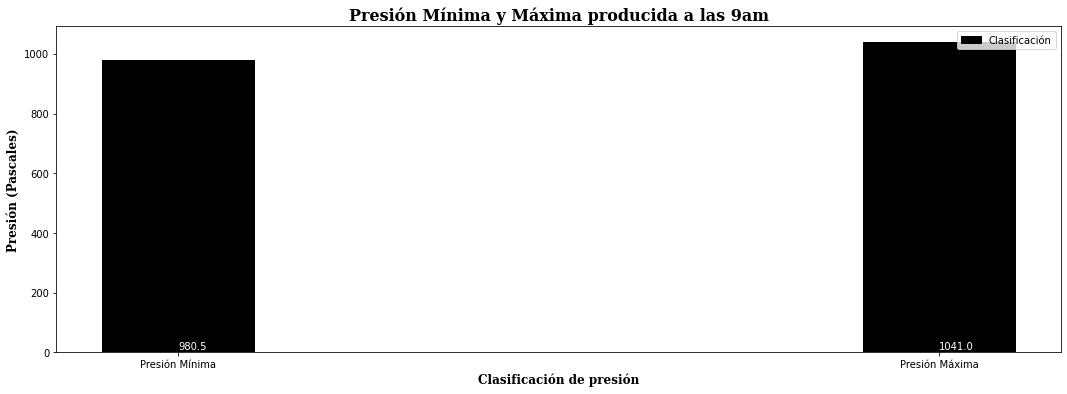

In [63]:
rango = df3.Pressure9am.max() - df3.Pressure9am.min()
print("La diferencia de presión entre el rango mínimo y máximo que se produce a las 9am es de" , rango, "pascales.")
getGraficoBarras1(["Presión Mínima","Presión Máxima"],[df3.Pressure9am.min().tolist(), df3.Pressure9am.max().tolist()],"Clasificación de presión","Presión (Pascales)","Presión Mínima y Máxima producida a las 9am","Clasificación",['#000'])

_Nota Gráfico de barras "Presión Mínima y Máxima producida a las 9am"._
### Se puede apreciar del gráfico de barras que la presión mínima medida en pascales producida a las 9 am es de 980.5 y la máxima de 1041.0, teniendo una diferencia de 60.5. 

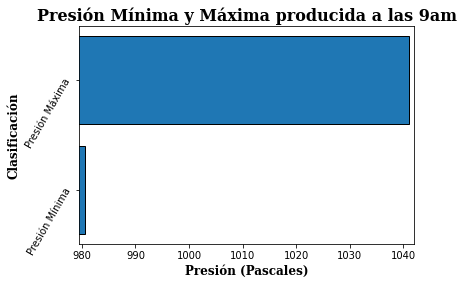

In [64]:
getGraficoBarras2(["Presión Mínima","Presión Máxima"],[df3.Pressure9am.min().tolist(), df3.Pressure9am.max().tolist()],"Presión (Pascales)","Clasificación","Presión Mínima y Máxima producida a las 9am")

_Nota Gráfico de barras Horizontal **"Presión Mínima y Máxima producida a las 9am."**_
### Del gráfico de barras horizontal se puede deducir que la presión máxima a las 9am es 1041.0 y la mínima fue de 980.5, teniendo una disparidad inferior a 100 pascales, con exactitud 60.5. 

### R: La diferencia de presión entre el rango mínimo y máximo que se produce a las 9am es de 60.5 pascales.

### 2. ¿Cuáles son las temperaturas mínimas y máximas que se producen a las 3pm?


In [65]:
# Rango de temperaturas mínimas
intervalo_min = df2.rango_temp_3pm.min()

# Rango de temperaturas máximas
intervalo_max = df2.rango_temp_3pm.max()

# Temp min 
t_min = df3.Temp3pm.min()
# Temp máx
t_max = df3.Temp3pm.max()

print("Temperatura Mínima registrada a las 3pm", t_min,"°C")
print("Temperatura Máxima registrada a las 3pm", t_max,"°C")
print("Intervalo de Temperaturas Mínimas registradas a las 3pm en el intervalo", intervalo_min, "equivalente a los -5.4 y -2.4 °C.")
print("Intervalo de Temperaturas Máximas registradas a las 3pm en el intervalo", intervalo_max, "equivalente a los 45.6 y 48.6 °C.")


Temperatura Mínima registrada a las 3pm -5.4 °C
Temperatura Máxima registrada a las 3pm 46.7 °C
Intervalo de Temperaturas Mínimas registradas a las 3pm en el intervalo 0 equivalente a los -5.4 y -2.4 °C.
Intervalo de Temperaturas Máximas registradas a las 3pm en el intervalo 17 equivalente a los 45.6 y 48.6 °C.


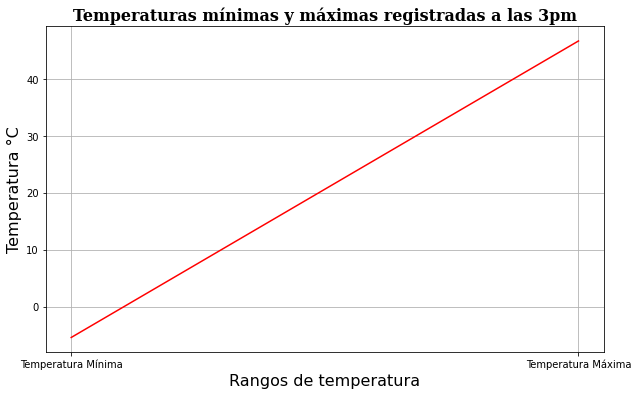

In [66]:
getGraficoLineas1(["Temperatura Mínima","Temperatura Máxima"],[t_min,t_max],"Rangos de temperatura","Temperatura °C","Temperaturas mínimas y máximas registradas a las 3pm")

Nota : Gráfico de línea "temperaturas mínimas y máximas registradas a las 3pm"
### Lo que se puede inferir de este gráfico lineal, son las temperaturas mínimas y máximas registradas a las 3 pm. La menor estaría bajo 0, apuntando a -5.4 grados Celsius. La mayor es superior a 45 °C, reconociéndose en 46.7 grados Celsius. 

In [67]:
# Comprobar el número de temperaturas registradas en cada tramo
df2['rango_temp_3pm'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,rango_temp_3pm
9,23263
8,22925
7,22530
6,16898
10,16739
11,12733
12,8787
5,8304
13,4178
14,2084


_Nota Tabla de calor **"Cantidad de temperaturas registradas por rangos".**_
### De la tabla de calor se desprenden la cantidad de temperaturas registradas a las 3 pm, clasificadas en intervalos. El intervalo con mayor registro de ellas fue  el número 9 que corresponde a las temperaturas que se encuentran entre 21.6 °C y los 24.6 °C y el de menor sería el intervalo 17 con 8 observaciones en el rango de temperaturas entre los  45.6 y 48.6 grados celsius.

### R:  Según las estadísticas analizadas nos muestra que en la jornada de tarde de las 3pm se identifica una baja de -5.4 °C. Además, se observa que la temperatura máxima registrada a las 3pm en diversas localidades corresponde a 46.7 °C. La representación de la temperatura mínima estipulada a las 3pm equivale a un rango entre -5.4 y -2.4 °C, mientras que las temperaturas máximas ingresada a las 3pm equivale a un rango entre 45.6 °C y 48.6 °C. 


### ¿Cuántos días ha precipitado según la característica RainToday?


In [68]:
# Contamos los días que llovió
# 1 Representa presencia en "YES".
total = df2.RainToday_Yes.count()

cant_dias_si = df2[(df2.RainToday_Yes == 1)]['RainToday_Yes'].count()
cant_dias_no = df2[(df2.RainToday_Yes == 0)]['RainToday_Yes'].count()
print("Según la característica RainToday, llovieron ", cant_dias_si, "días de los",total,"registrados.")


Según la característica RainToday, llovieron  31455 días de los 142193 registrados.


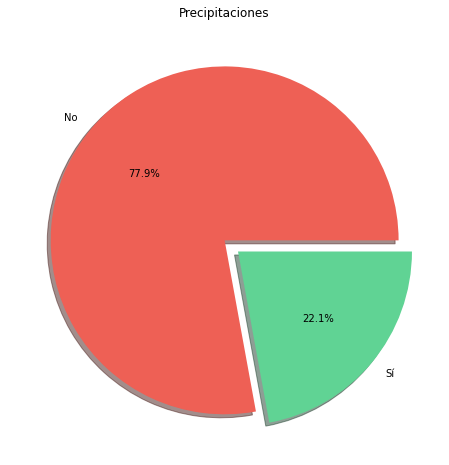

In [69]:
getGraficoPie1(df2,"RainToday_Yes",["No","Sí"],"Precipitaciones")

_Nota : Gráfico Pie **"Precipitaciones."**_
#### Del gráfico de torta o circular se puede deducir que, de los días registrados, en menos del 25% hubo precipitaciones, teniendo con exactitud un 22.1%. Junto a esto, más del 75% (77.9%) de ellos, no tuvieron lluvias.

### R: Según la característica RainToday, 31455 días de los 142193 registrados, tuvieron precipitaciones.

### ¿Cuántas observaciones poseen las siguientes localidades ?

- Portland
- NorfolkIsland
- Moree
- Albany
- Albury

In [70]:
# Función que permite contar las observaciones según la localidad
def cantidadObservaciones(location_encoder):
    return df2[(df2.Location_encoder == location_encoder)]['Location_encoder'].count()


portland = cantidadObservaciones(33)
norfolkIsland = cantidadObservaciones(27)
moree = cantidadObservaciones(21)
albany = cantidadObservaciones(1)
albury = cantidadObservaciones(2)


print("========================================================================")
print(" OBSERVACIONES POR LOCALIDAD")
print("========================================================================")
print("La localidad de portland tiene un registro de", portland, "observaciones.")
print("La localidad de norfolkIsland tiene un registro de", norfolkIsland, "observaciones.")
print("La localidad de moree tiene un registro de", moree, "observaciones.")
print("La localidad de albany tiene un registro de", albany, "observaciones.")
print("La localidad de albury tiene un registro de", albury, "observaciones.")
print("========================================================================")


 OBSERVACIONES POR LOCALIDAD
La localidad de portland tiene un registro de 2996 observaciones.
La localidad de norfolkIsland tiene un registro de 2964 observaciones.
La localidad de moree tiene un registro de 2854 observaciones.
La localidad de albany tiene un registro de 3016 observaciones.
La localidad de albury tiene un registro de 3011 observaciones.


2996
2964
2854
3016
3011


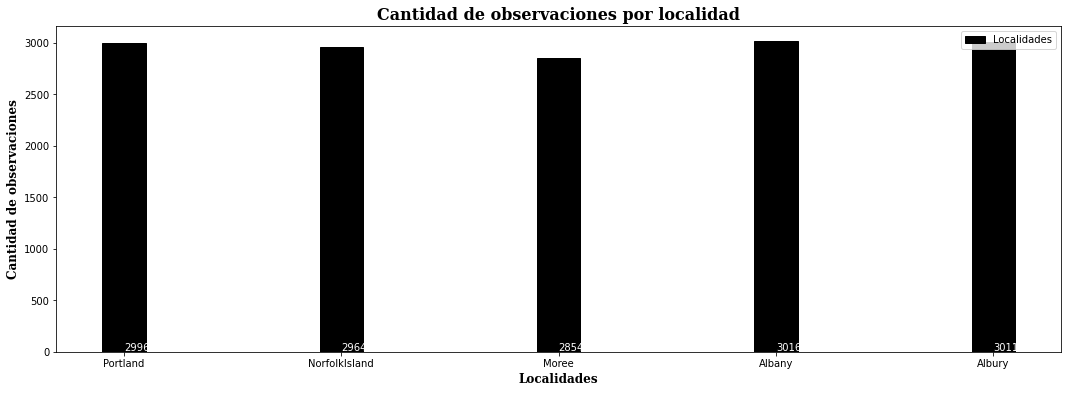

In [71]:
registros = ['Portland','NorfolkIsland','Moree','Albany','Albury']
listitaReg = []
for x in range(len(registros)):
    print(df3[(df3.Location == registros[x])]["Location"].count())
    listitaReg.append(df3[(df3.Location == registros[x])]["Location"].count())

getGraficoBarras1(registros, listitaReg,"Localidades","Cantidad de observaciones","Cantidad de observaciones por localidad","Localidades",["#000"])

_Nota de gráfico de barras **"Cantidad de observaciones por localidad."**_
### En el gráfico de barras se pueden visualizar las localidades y la cantidad de observaciones, donde se infiere que la localidad que tuvo más registros fue Canberra con un total de 3418. De la misma forma la que tuvo menos fue Uluru con 1521.

## R: Cantidad de observaciones por localidad 
- La localidad de Portland posee un registro de 2996 observaciones.
- La localidad de NorfolkIsland dispone de un registro de 2964 observaciones.
- La localidad de Moree goza de un registro de 2854 observaciones.
- La localidad de Albany consta de un registro de 3016 observaciones.
- La localidad de Albury conserva un registro de 3011 observaciones.

## - Localidad con el mayor número de observaciones

In [72]:
cantidad = df3.Location.value_counts().max()
nombre = df3.Location.value_counts().idxmax()
print("La localidad con el mayor número de observaciones es", nombre, "con un total de",cantidad, "registros.")

La localidad con el mayor número de observaciones es Canberra con un total de 3418 registros.


### R: La localidad con el mayor número de observaciones es Canberra con un total de 3418 registros.

## - Localidad con el menor número de observaciones.

In [73]:
cantidad = df3.Location.value_counts().min()
nombre = df3.Location.value_counts().idxmin()
print("La localidad con el menor número de observaciones es", nombre, "con un total de",cantidad, "registros.")

La localidad con el menor número de observaciones es Uluru con un total de 1521 registros.


### R: La localidad con el menor número de observaciones es Uluru con un total de 1521 registros.

## 3.2 Preguntas propuestas

#### ** Ver Anexo de excel **

### Pregunta Nro. 1
## Si hoy hubo precipitaciones, ¿Cuál es la probabilidad de que mañana también llueva?

In [74]:
# Agrupamos todos los datos por RainToday y RainTomorrow.
# indicamos una cabecera para distribuir los elementos como quiera y mostramos las cantidades
dataRain = pd.DataFrame(df2.groupby(['RainToday_Yes','RainTomorrow_Yes'])['RainToday_Yes'].count())
dataRain

RainToday_Yes
RainToday_Yes RainTomorrow_Yes               
0             0                         93458
              1                         17280
1             0                         16858
              1                         14597

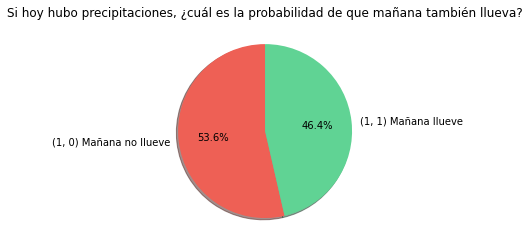

In [75]:
 # Respondiendo, gráficamente a: Si hoy hubo precipitaciones, ¿cuál es la probabilidad de que mañana también llueva?
df_pie = pd.DataFrame(df2[df2.RainToday_Yes == 1].groupby(['RainToday_Yes','RainTomorrow_Yes'])['RainToday_Yes'].count())
colores = ["#EE6055","#60D394"]
plt.pie(np.array(df_pie).ravel(), labels=[str(df_pie.index[0]) + " Mañana no llueve",str(df_pie.index[1]) + " Mañana llueve"],
autopct='%1.1f%%', shadow=True, startangle=90, colors = colores)
plt.title('Si hoy hubo precipitaciones, ¿cuál es la probabilidad de que mañana también llueva?')
plt.show()

_Nota Gráfico de Pie **"Si hoy hubo precipitaciones, ¿Cuál es la probabilidad de que mañana también llueva?".**_
### Se puede observar según las estadísticas que la probabilidad de que se pronostiquen lluvias al día siguiente sabiendo que hoy precipitó es cercano al 50%.

### R: La probabilidad de que al día siguiente llueva si hoy hubo precipitaciones es de un 46%.

### Pregunta Nro. 2
### ¿En qué localidad hubo más precipitaciones y en cuál hubo menos?

In [76]:
# Agrupamos por código de la locacion y dia de caundo hubo precipitación
df_loc = pd.DataFrame(df2[df2.RainToday_Yes == 1].groupby(['Location_encoder','RainToday_Yes'])['RainToday_Yes'].count())

# Obtenemos el ID de la locación con más precipitaciones y la con menos precipitaciones
locaciones = [df_loc.idxmax(), df_loc.idxmin()]

# Obtenemos la cantidad de días de la locación con más precipitaciones y la con menos precipitaciones.
cant_p = [df_loc.max(),df_loc.min()]

# Guardamos los datos de ambas locaciones
datos = {'Locaciones':locaciones,'cant_dias_p':cant_p}

df_loc = pd.DataFrame(data = datos)

locaciones = []

# Recorremos la serie para obtener el valor de la key de la localidad
for x in df_loc.Locaciones.tolist():
    locaciones.append(x[0][0])

cant_p = []
for x in df_loc.cant_dias_p.tolist():
    cant_p.append(x[0])

# Guardamos los datos de ambas locaciones
datos = {'Locaciones':locaciones,'cant_dias_p':cant_p}

# 33	Portland
# 41	Uluru
df_loc = pd.DataFrame(data = datos)
df_loc

,Locaciones,cant_dias_p
0,33,1088
1,41,113


In [77]:
# Extraemos los nombres con las claves obtenidas
key_1 = locaciones[0]
locaciones[0] = data.query("Clave==@key_1")["Valor"].values.tolist()[0]
key_2 = locaciones[1]
locaciones[1] = data.query("Clave==@key_2")["Valor"].values.tolist()[0]
locaciones

# Guardamos los datos de ambas locaciones
datos = {'Locaciones':locaciones,'cant_dias_p':cant_p}

# 33	Portland
# 41	Uluru
df_loc = pd.DataFrame(data = datos)
df_loc

,Locaciones,cant_dias_p
0,Portland,1088
1,Uluru,113


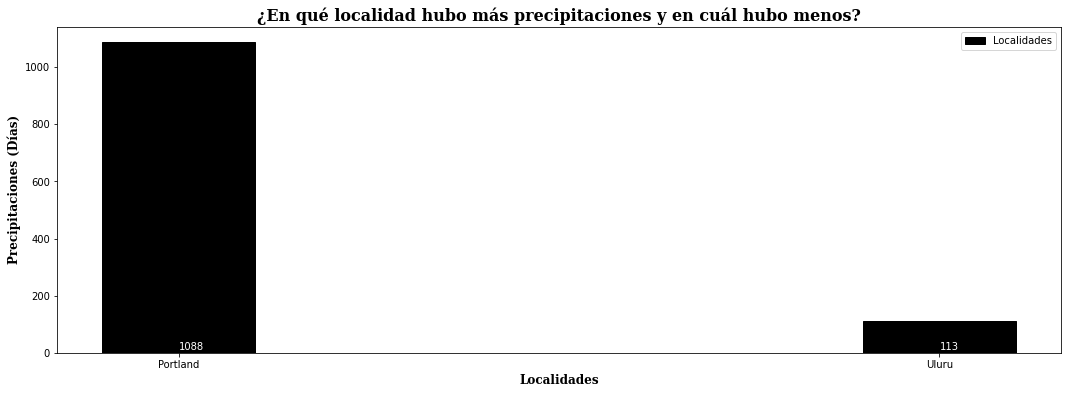

In [78]:
getGraficoBarras1(locaciones,cant_p,"Localidades","Precipitaciones (Días)","¿En qué localidad hubo más precipitaciones y en cuál hubo menos?","Localidades",["#000"])

_Nota Gráfico **"En qué localidad hubo más precipitaciones y en cuál hubo menos?"**_
#### En el gráfico de barras se visualiza las localidades más y menos lluviosas, teniendo por un lado al estado de Portland y Uluru Respectivamente.

### R: En la localidad que hubo más precipitaciones registradas corresponden a Portland con un total de 1088 días, mientras en el estado de Uluru no sobrepasa los 113 días.

### Pregunta Nro. 3
### ¿Cuál es el promedio de humedad del aire a las 9am en las localidades de Portland y Uluru?

In [79]:
# Agrupamos por el nombre de la localidad y sacamos el promedio de las 2 localidades indicadas.
df_hum = pd.DataFrame(df3[(df3.Location == "Portland") | (df3.Location== "Uluru")].groupby(['Location'])['Humidity9am'].mean())
df_hum

,Humidity9am
Location,
Portland,78.573164
Uluru,42.472321


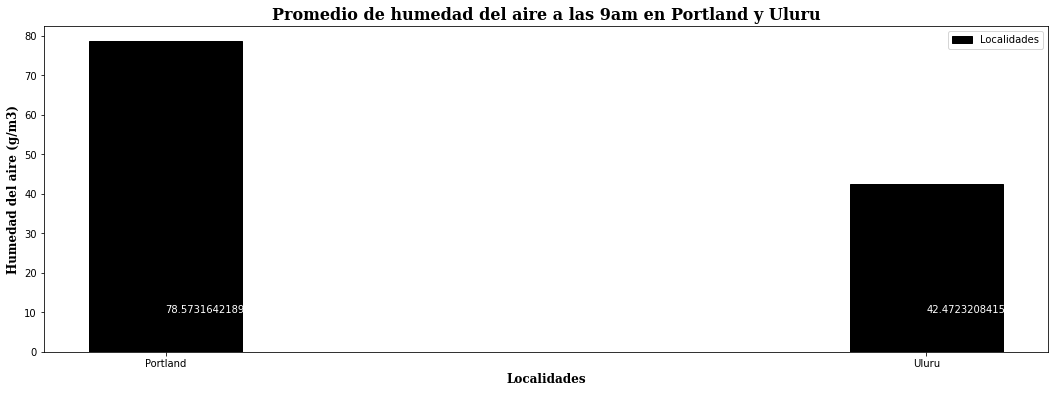

In [80]:
list_hum = [df_hum.Humidity9am[0], df_hum.Humidity9am[1]]
list_loc = [df_hum.Humidity9am.index[0], df_hum.Humidity9am.index[1]]

getGraficoBarras1(list_loc,list_hum,"Localidades","Humedad del aire (g/m3)","Promedio de humedad del aire a las 9am en Portland y Uluru","Localidades","#000")

_Nota Gráfico **"Promedio de humedad del aire a las 9am en Portland y Uluru"**_
#### Se puede inferir que en promedio la humedad del aire a las 9 am en la localidad de Portland es superior a los 70 (g/m3), en cambio en el estado de Uluru no supera los 50 (g/m3).

### R : En promedio la humedad del aire en el estado de Portland es de 78.5 (g/m3) y en la localidad de Uluru es de 42.4 (g/m3).

# Renombramos los campos del dataframe

In [81]:
df4=df4.rename(columns ={'MinTemp':'TempMinima'})
df4=df4.rename(columns ={'MaxTemp':'TempMaxima'})
df4=df4.rename(columns ={'Rainfall':'LluviaMM'})
df4=df4.rename(columns ={'WindGustSpeed':'VelViento'})
df4=df4.rename(columns ={'WindSpeed9am':'VelViento9am'})
df4=df4.rename(columns ={'WindSpeed3pm':'VelViento3pm'})
df4=df4.rename(columns ={'Humidity9am':'Humedad9am'})
df4=df4.rename(columns ={'Humidity3pm':'Humedad3pm'})
df4=df4.rename(columns ={'Location_encoder':'Ubicacion'})
df4=df4.rename(columns ={'RISK_MM':'RiesgoMM'})
df4=df4.rename(columns ={'Pressure9am':'PresionAire9am'})
df4=df4.rename(columns ={'Pressure3pm':'PresionAire3pm'})
df4=df4.rename(columns ={'Cloud9am':'Nubosidad9am'})
df4=df4.rename(columns ={'Cloud3pm':'Nubosidad3pm'})
df4=df4.rename(columns ={'Temp9am':'Temperatura9am'})
df4=df4.rename(columns ={'Temp3pm':'Temperatura3pm'})
df4=df4.rename(columns ={'Sunshine':'LuzSolar'})
df4=df4.rename(columns ={'Evaporation':'Evaporacion'})
df4=df4.rename(columns ={'RainToday_Yes':'LloveraHoy'})
df4=df4.rename(columns ={'WindGustDir':'DireccionViento'})
df4=df4.rename(columns ={'WindDir9am':'DireccionViento9am'})
df4=df4.rename(columns ={'WindDir3pm':'DireccionViento3pm'})
df4=df4.rename(columns ={'Day':'Dia'})
df4=df4.rename(columns ={'Month':'Mes'})
df4=df4.rename(columns ={'Year':'Año'})
df4=df4.rename(columns ={'RainTomorrow_Yes':'LloveraMañana'})

In [82]:
df4.describe()

,TempMinima,TempMaxima,LluviaMM,Evaporacion,LuzSolar,DireccionViento,VelViento,DireccionViento9am,DireccionViento3pm,VelViento9am,...,Nubosidad3pm,Temperatura9am,Temperatura3pm,RiesgoMM,LloveraMañana,LloveraHoy,Ubicacion,Dia,Mes,Año
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.131807,23.226724,2.326738,3.129340,7.613000,8.059039,39.985316,7.000316,7.788485,13.869248,...,2.695034,16.987588,21.687480,2.360682,0.224181,0.221213,23.740655,15.715084,6.402544,2012.758926
std,6.440548,7.109555,8.426426,4.166674,2.734956,4.694267,13.138386,4.514678,4.546322,8.954477,...,3.050051,6.472166,6.870771,8.477969,0.417043,0.415065,14.237503,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2007.000000
25%,7.500000,17.900000,0.000000,0.000000,7.600000,4.000000,31.000000,3.000000,4.000000,7.000000,...,0.000000,12.300000,16.700000,0.000000,0.000000,0.000000,11.000000,8.000000,3.000000,2011.000000
50%,12.000000,22.700000,0.000000,1.600000,7.600000,9.000000,39.000000,7.000000,8.000000,13.000000,...,1.000000,16.800000,21.300000,0.000000,0.000000,0.000000,24.000000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,13.000000,46.000000,11.000000,12.000000,19.000000,...,6.000000,21.500000,26.300000,0.800000,0.000000,0.000000,36.000000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,15.000000,130.000000,...,9.000000,40.200000,46.700000,371.000000,1.000000,1.000000,48.000000,31.000000,12.000000,2017.000000


# Modelos de Machine Learning

In [95]:
# Mapa de correlación
df4.corr()

,TempMinima,TempMaxima,LluviaMM,Evaporacion,LuzSolar,DireccionViento,VelViento,DireccionViento9am,DireccionViento3pm,VelViento9am,...,Nubosidad3pm,Temperatura9am,Temperatura3pm,RiesgoMM,LloveraMañana,LloveraHoy,Ubicacion,Dia,Mes,Año
TempMinima,1.000000,0.728149,0.102244,0.367894,0.051897,-0.140754,0.171621,-0.024761,-0.158737,0.181565,...,0.117932,0.890627,0.694230,0.121411,0.082019,0.056575,-0.005299,0.001892,-0.201391,0.039652
TempMaxima,0.728149,1.000000,-0.073852,0.406292,0.331834,-0.212215,0.066320,-0.212587,-0.181345,0.016627,...,-0.104215,0.880078,0.969743,-0.044154,-0.159086,-0.226474,-0.020489,-0.000493,-0.164435,0.058300
LluviaMM,0.102244,-0.073852,1.000000,-0.054656,-0.172623,0.044517,0.126934,0.085468,0.047719,0.084768,...,0.126294,0.011362,-0.077285,0.300183,0.235087,0.501565,-0.003855,0.001116,-0.030623,-0.009394
Evaporacion,0.367894,0.406292,-0.054656,1.000000,0.215650,-0.080848,0.128787,-0.056523,-0.055623,0.169056,...,0.172650,0.402342,0.396135,-0.035194,-0.076461,-0.111719,-0.001975,-0.003173,-0.010935,-0.073132
LuzSolar,0.051897,0.331834,-0.172623,0.215650,1.000000,-0.064851,-0.022237,-0.070330,-0.033185,0.006242,...,-0.382004,0.210668,0.349641,-0.222483,-0.327003,-0.238940,0.002177,-0.000846,0.017321,0.007022
DireccionViento,-0.140754,-0.212215,0.044517,-0.080848,-0.064851,1.000000,0.137730,0.356896,0.565814,-0.002320,...,0.034240,-0.178067,-0.223652,-0.006275,0.053447,0.127651,-0.005055,-0.001470,0.044115,-0.021880
VelViento,0.171621,0.066320,0.126934,0.128787,-0.022237,0.137730,1.000000,0.074653,0.136664,0.570708,...,0.098823,0.146760,0.032267,0.156624,0.225271,0.148250,0.069235,-0.008920,0.058869,-0.031439
DireccionViento9am,-0.024761,-0.212587,0.085468,-0.056523,-0.070330,0.356896,0.074653,1.000000,0.301298,0.121821,...,0.047038,-0.115642,-0.219984,0.004280,0.035776,0.168410,-0.004434,-0.005781,0.026215,-0.001550
DireccionViento3pm,-0.158737,-0.181345,0.047719,-0.055623,-0.033185,0.565814,0.136664,0.301298,1.000000,0.046813,...,0.019926,-0.175854,-0.192924,-0.017401,0.030488,0.123130,0.008325,-0.000446,0.035165,-0.000677
VelViento9am,0.181565,0.016627,0.084768,0.169056,0.006242,-0.002320,0.570708,0.121821,0.046813,1.000000,...,0.119961,0.127348,0.006601,0.066521,0.088482,0.101081,0.080678,-0.008836,0.049084,-0.015395


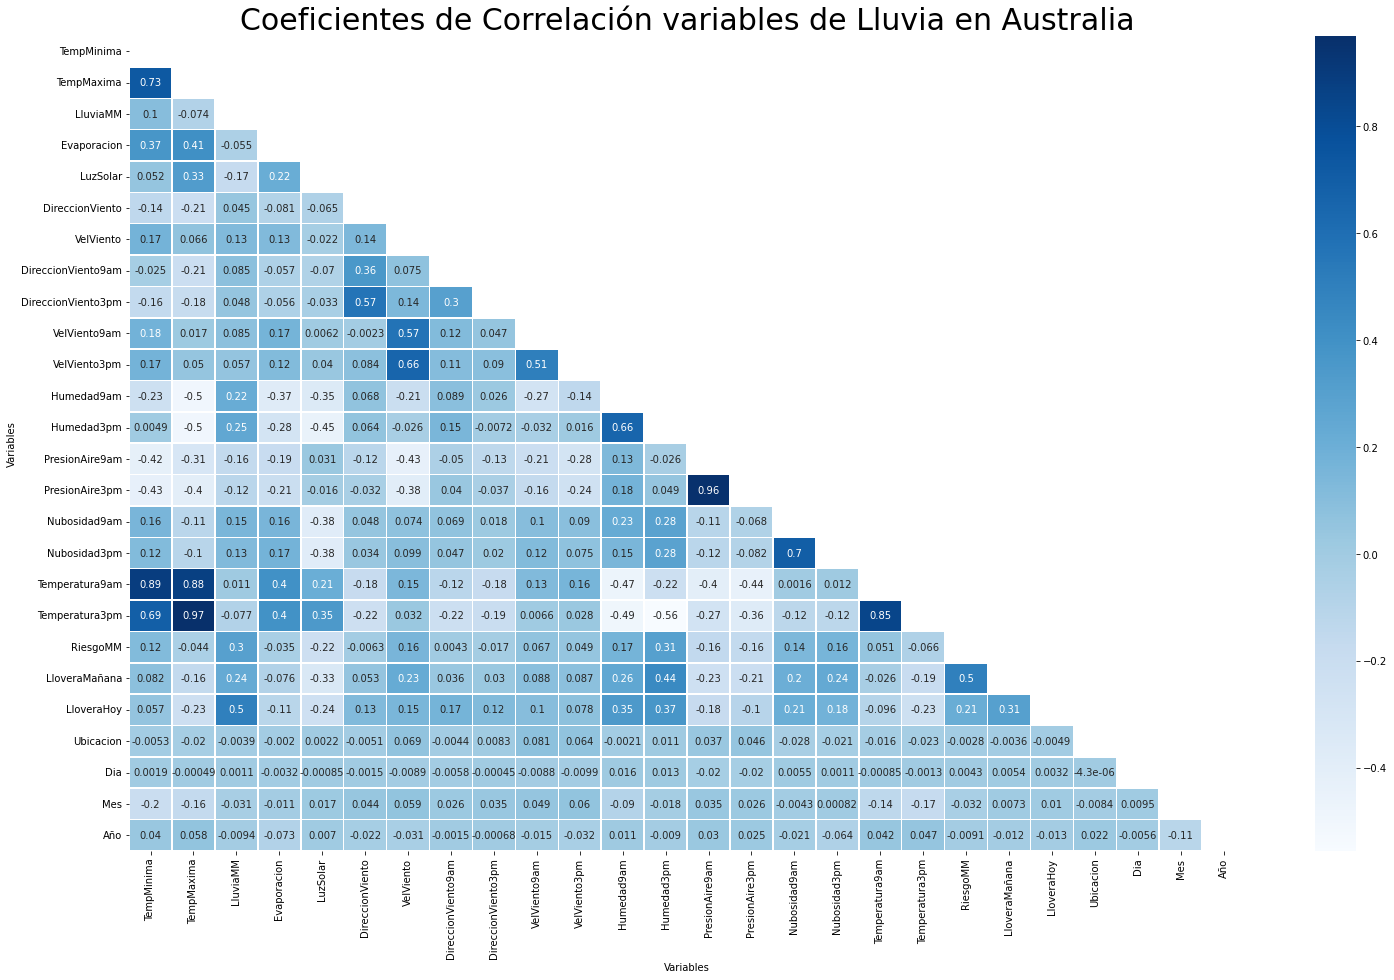

In [96]:
# Gráfico de calor
fig, ax = plt.subplots(figsize=(25,15))
mask = np.triu(np.ones_like(df4.corr(), dtype=np.bool))
sns.heatmap(df4.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)
ax.set(xlabel='Variables', ylabel='Variables')
title = 'Coeficientes de Correlación variables de Lluvia en Australia'
plt.title(title, fontsize=30)
plt.show()

In [97]:
# Calcular coeficientes de correlación de cada una de las variables.
# Exceptuando x vs x
cantidad = len(df4.columns)
columnas = df4.columns

for x in columnas:
    print(x)
# Calculamos la cantidad de combinaciones posibles para estimar su coeficiente de correlación
print("\n","La cantidad de columnas son ",cantidad, " y la cantidad de combinaciones son", cantidad * (cantidad - 1))

TempMinima
TempMaxima
LluviaMM
Evaporacion
LuzSolar
DireccionViento
VelViento
DireccionViento9am
DireccionViento3pm
VelViento9am
VelViento3pm
Humedad9am
Humedad3pm
PresionAire9am
PresionAire3pm
Nubosidad9am
Nubosidad3pm
Temperatura9am
Temperatura3pm
RiesgoMM
LloveraMañana
LloveraHoy
Ubicacion
Dia
Mes
Año

 La cantidad de columnas son  26  y la cantidad de combinaciones son 650


In [98]:
# Creamos función para calcular el coeficiente de correlación 
def calcularCoeficienteCorrelacion(dataframe, caracteristicas, rango, index):
    for x in range(0,rango):
        if(index != x):
            coef = np.corrcoef(dataframe[caracteristicas[index]],dataframe[columnas[x]])[0,1]
            if coef > 0.5 or coef < -0.5:
                print(caracteristicas[index],"vs",columnas[x],coef)

In [99]:
calcularCoeficienteCorrelacion(df4,columnas,cantidad,1)

TempMaxima vs TempMinima 0.728149295825584
TempMaxima vs Temperatura9am 0.8800777459540147
TempMaxima vs Temperatura3pm 0.9697427790329709


In [100]:
dataScatter = {
    "dataframe" : None,
    "x" : None,
    "y" : None,
    "title" : "Default",
    "color" : '#000',
    "label" : "Default",
    "xlabel" : "Default",
    "ylabel" : "Default"
}

def graficoDispersion(data : dataScatter):
    data['dataframe'].plot(kind="scatter",y=data['y'],x=data['x'],  color=data['color'],label=data['label'])
    plt.xlabel(data['xlabel'])
    plt.ylabel(data['ylabel'])
    plt.title(data['title'])
    plt.show()

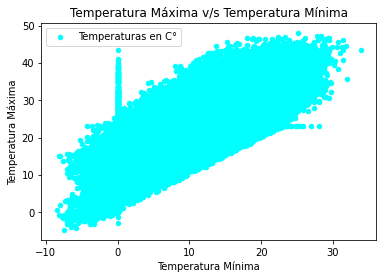

In [101]:
# MaxTemp VS MinTemp
dataScatter = {
    "dataframe" : df4,
    "x" : "TempMinima",
    "y" : "TempMaxima",
    "title" : "Temperatura Máxima v/s Temperatura Mínima",
    "color" : '#00FFFF',
    "label" : "Temperaturas en C°",
    "xlabel" : "Temperatura Mínima",
    "ylabel" : "Temperatura Máxima"
}

graficoDispersion(dataScatter)

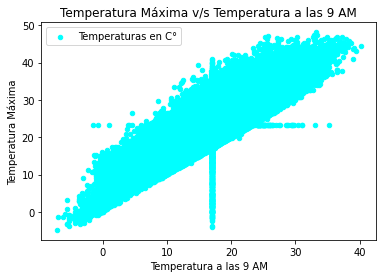

In [102]:
# MaxTemp VS MinTemp
dataScatter = {
    "dataframe" : df4,
    "x" : "Temperatura9am",
    "y" : "TempMaxima",
    "title" : "Temperatura Máxima v/s Temperatura a las 9 AM",
    "color" : '#00FFFF',
    "label" : "Temperaturas en C°",
    "xlabel" : "Temperatura a las 9 AM",
    "ylabel" : "Temperatura Máxima"
}

graficoDispersion(dataScatter)

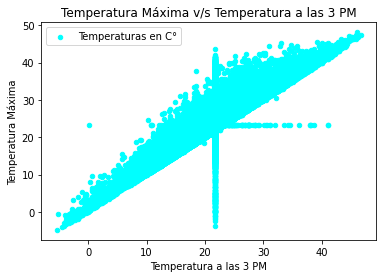

In [103]:
# MaxTemp VS Temp3pm
dataScatter = {
    "dataframe" : df4,
    "x" : "Temperatura3pm",
    "y" : "TempMaxima",
    "title" : "Temperatura Máxima v/s Temperatura a las 3 PM",
    "color" : '#00FFFF',
    "label" : "Temperaturas en C°",
    "xlabel" : "Temperatura a las 3 PM",
    "ylabel" : "Temperatura Máxima"
}

graficoDispersion(dataScatter)

# Modelos para Machine Learning

In [133]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Librería para dividir datos de entrenamiento
from sklearn.model_selection import cross_val_score

### Regresión Lineal Simple

In [146]:
# Creamos una instancia de linear_model.LinearRegression
modelo = linear_model.LinearRegression()

In [147]:
# Regresión Lineal
MinTemp_X = df4["TempMinima"]
MaxTemp_y = df4["TempMaxima"]

# Dividimos los datos
# Tomamos el 30% de los datos para pruebas
# El otro 70% serán datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(MinTemp_X, MaxTemp_y, test_size=0.3,random_state=10)

In [148]:
print("Toma de datos aleatorios")
print("==============================================================")
print("Hay", len(np.array(X_train)),"datos de entrenamiento para X.")
print("Hay", len(np.array(X_test)),"datos de prueba para X.")
print("Hay", len(np.array(X_train)),"datos de entrenamiento para Y.")
print("Hay", len(np.array(X_test)),"datos de prueba para Y.")
print("==============================================================")

Toma de datos aleatorios
Hay 99535 datos de entrenamiento para X.
Hay 42658 datos de prueba para X.
Hay 99535 datos de entrenamiento para Y.
Hay 42658 datos de prueba para Y.


In [149]:
# Convertimos las variables de Series a Array para poder trabajarlas
# Luego transformamos su estrutura en un arreglo Unidimensional
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

In [150]:
# Entrenamos el modelo
modelo.fit(X_train,Y_train)

# Creamos la predicción
Y_predict = modelo.predict(X_test)

In [151]:
Y_predict

array([[30.36856173],
       [27.87602866],
       [18.06670495],
       ...,
       [22.16732387],
       [19.43357792],
       [30.36856173]])

In [152]:
len(Y_predict)

42658

In [153]:
a = modelo.intercept_
b = modelo.coef_
print('Coeficientes: \n b1=', modelo.coef_, 'a=', modelo.intercept_)

Coeficientes: 
 b1= [[0.80404293]] a= [13.48366026]


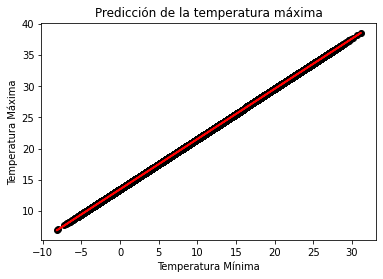

In [154]:
plt.scatter(X_test,Y_predict,color='black')
plt.plot(X_test,Y_predict,color='red',linewidth=1.8)
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.title('Predicción de la temperatura máxima')
plt.show()

In [155]:
df4[['TempMaxima', 'TempMinima']].describe

<bound method NDFrame.describe of         TempMaxima  TempMinima
0             22.9        13.4
1             25.1         7.4
2             25.7        12.9
3             28.0         9.2
4             32.3        17.5
...            ...         ...
142188        21.8         3.5
142189        23.4         2.8
142190        25.3         3.6
142191        26.9         5.4
142192        27.0         7.8

[142193 rows x 2 columns]>

In [156]:
# y = a + bx
x = 13.4
y = a + b * x
y

array([[24.25783548]])

In [160]:
r2_lineal   = modelo.score(X_test, Y_test) 
rmse_lineal = np.sqrt(mean_squared_error(Y_test, Y_predict))
print("Precisión del modelo : %.2f" % modelo.score (X_train,Y_train))
print("R2  %.2f" %  r2_score(Y_test,Y_predict))
print(f"RMSE: %.2f" % rmse_lineal)
puntaje_lineal = cross_val_score(modelo, X_train, Y_train, cv=3)
print("Validación cruzada: %.2f" % np.mean(puntaje_lineal) )

Precisión del modelo : 0.53
R2  0.53
RMSE: 4.85
Validación cruzada: 0.53


### Selección de variables

In [198]:
# Se separan las variables predictoras y predecida
x = df4[['Temperatura9am','Temperatura3pm','TempMinima']] # Variables independientes
y = df4['TempMaxima'] # Variable dependiente

# Regresión Lineal Múltiple

In [199]:
# Realizar separación de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 29)

# Indicar tipo de modelo
modelo = linear_model.LinearRegression()

# Entrenar el modelo 
modelo.fit(X_train, y_train)

# Validar el modelo
y_predic = modelo.predict(X_test)

#
print(y_predic)

[17.04777236 16.11512485 26.31199215 ... 21.64350887 22.33581198
 39.4551254 ]


In [200]:
# Evaluación del modelo
print("Precisión del modelo : %.2f" % modelo.score(X_train,y_train))
print('R2 : %.2f' % r2_score(y_test,y_predic))
print("Mse: %.2f" % mean_squared_error(y_predic,y_test))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_predic)))
#Validacion Cruzada 
puntaje_lineal = cross_val_score(modelo, X_train, y_train, cv=3)
print("Validación cruzada: %.2f" % np.mean(puntaje_lineal))

Precisión del modelo : 0.95
R2 : 0.95
Mse: 2.34
RMSE: 1.53
Validación cruzada: 0.95


In [201]:
X_test.head()

,Temperatura9am,Temperatura3pm,TempMinima
103563,10.0,16.1,5.7
18937,13.8,13.9,10.0
122581,18.2,24.6,3.1
46040,8.4,13.5,1.9
24782,5.1,16.5,2.5


In [202]:
# Predicción entregando los valores que tenemos el entrenamiento
y_predic = modelo.predict([[10.0,16.1,5.7]])
y_predic

array([17.04777236])

In [203]:
# Predicción con valores propios
y_predic = modelo.predict([[15,20,12]])
y_predic

array([21.31656181])

# Árbol de Decisión de Regresión

In [204]:
# Importamos librerías necesarias
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [205]:
# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 29)

modelo = DecisionTreeRegressor(max_depth = 4, random_state = 29)

# Entrenamos el modelo
modelo.fit(X_train,y_train)

# Creamos la prediccion

y_pred = modelo.predict(X_test)

In [206]:
# Evaluamos el modelo
print('La precisión del modelo (en entrenamiento) es:',
     modelo.score(X_train, y_train))


print('La precisión del modelo (en la validación) es:',
     modelo.score(X_test, y_test))

# Evaluamos el resultado del modelo
print('Precisión del modelo :',modelo.score(X_test,y_test))

La precisión del modelo (en entrenamiento) es: 0.9416198864507871
La precisión del modelo (en la validación) es: 0.9426098550569321
Precisión del modelo : 0.9426098550569321


In [207]:
# Evaluación del modelo
print("Precisión del modelo : %.2f" % modelo.score(X_train,y_train))
print('R2 : %.2f' % r2_score(y_test,y_pred))
print("Mse: %.2f" % mean_squared_error(y_pred,y_test))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
#Validacion Cruzada 
puntaje_lineal = cross_val_score(modelo, X_train, y_train, cv=3)
print("Validación cruzada: %.2f" % np.mean(puntaje_lineal))

Precisión del modelo : 0.94
R2 : 0.94
Mse: 2.88
RMSE: 1.70
Validación cruzada: 0.94


In [212]:
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

In [213]:
y_pred_tree = tree_reg.predict(X_test)

In [214]:
X_test

,Temperatura9am,Temperatura3pm,TempMinima
103563,10.0,16.1,5.7
18937,13.8,13.9,10.0
122581,18.2,24.6,3.1
46040,8.4,13.5,1.9
24782,5.1,16.5,2.5
...,...,...,...
109643,19.2,22.0,7.3
58950,11.3,14.7,7.8
5851,22.7,18.3,21.3
38938,14.3,21.4,10.3


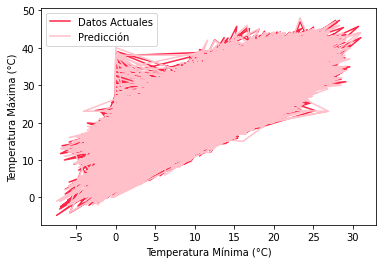

In [215]:
plt.plot(X_test["TempMinima"],y_test, label="Datos Actuales",color='#ff2547')
plt.plot(X_test["TempMinima"],np.rint(y_pred_tree), label="Predicción", color = '#ffc0ca')
plt.xlabel("Temperatura Mínima (°C)")
plt.ylabel('Temperatura Máxima (°C)')
plt.legend(loc='best')
plt.show()

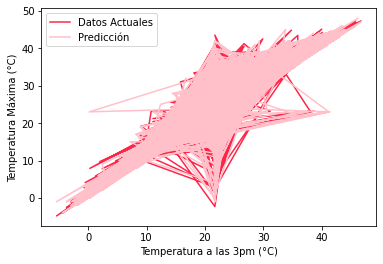

In [216]:
plt.plot(X_test["Temperatura3pm"],y_test, label="Datos Actuales",color='#ff2547')
plt.plot(X_test["Temperatura3pm"],np.rint(y_pred_tree), label="Predicción", color = '#ffc0ca')
plt.xlabel("Temperatura a las 3pm (°C)")
plt.ylabel('Temperatura Máxima (°C)')
plt.legend(loc='best')
plt.show()

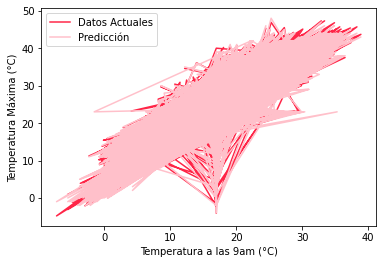

In [217]:
plt.plot(X_test["Temperatura9am"],y_test, label="Datos Actuales",color='#ff2547')
plt.plot(X_test["Temperatura9am"],np.rint(y_pred_tree), label="Predicción",color = '#ffc0ca')
plt.xlabel("Temperatura a las 9am (°C)")
plt.ylabel('Temperatura Máxima (°C)')
plt.legend(loc='best')
plt.show()

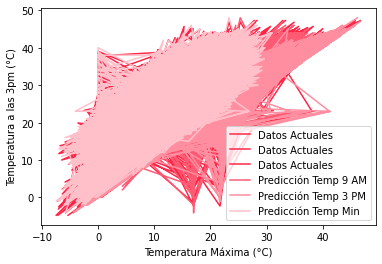

In [221]:
plt.plot(X_test['Temperatura9am'],y_test, label="Datos Actuales",color='#ff2547')
plt.plot(X_test['Temperatura3pm'],y_test, label="Datos 3pm",color='#ff2547')
plt.plot(X_test['TempMinima'],y_test, label="Datos min",color='#ff2547')
plt.plot(X_test["Temperatura9am"],np.rint(y_pred_tree), label="Predicción Temp 9 AM",color = '#ff5a74')
plt.plot(X_test["Temperatura3pm"],np.rint(y_pred_tree), label="Predicción Temp 3 PM", color = '#ff8fa0')
plt.plot(X_test["TempMinima"],np.rint(y_pred_tree), label="Predicción Temp Min", color = '#ffc0ca')
plt.ylabel("Temperatura a las 3pm (°C)")
plt.xlabel('Temperatura Máxima (°C)')
plt.legend(loc='best')
plt.show()

La profundidad del arbol es :  4
El numero de nodos terminales es :  16


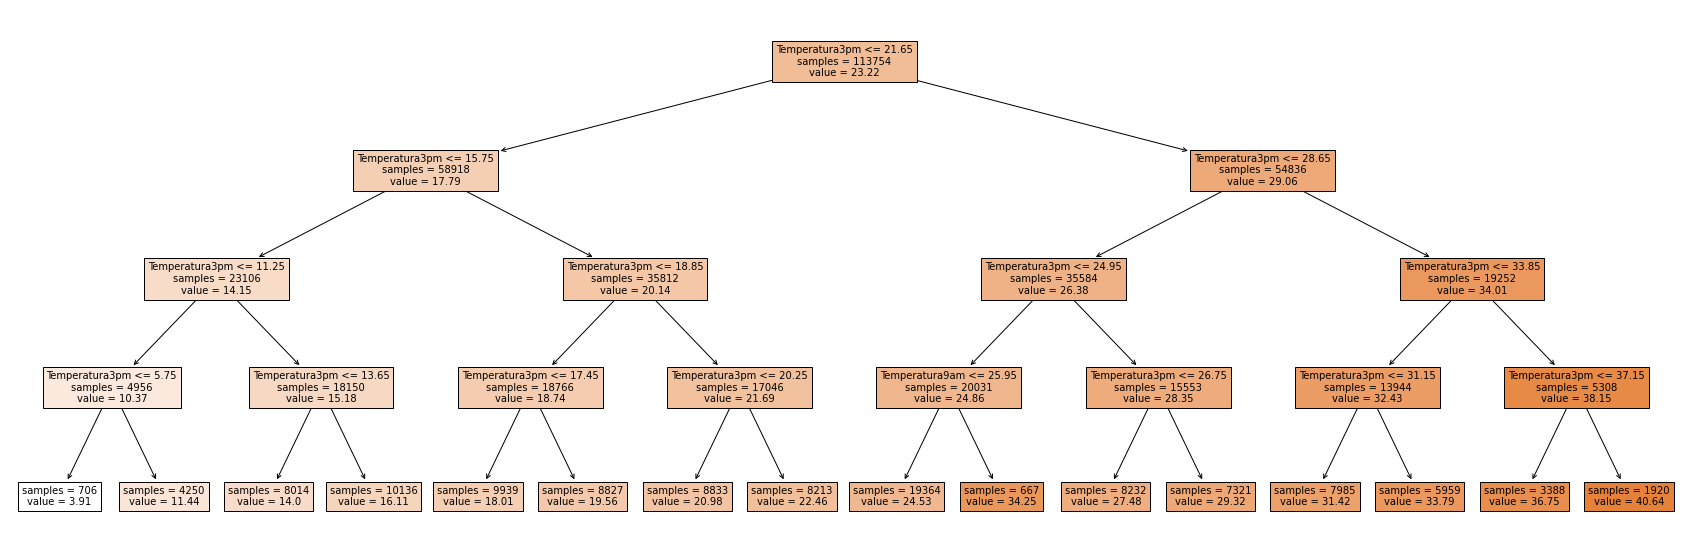

In [182]:
from sklearn.tree import plot_tree
fig , ax = plt.subplots(figsize = (30,10))

print(f"La profundidad del arbol es :  {modelo.get_depth()}")
print(f"El numero de nodos terminales es :  {modelo.get_n_leaves()}")

plot = plot_tree(
    decision_tree = modelo,
    feature_names = ['Temperatura9am','Temperatura3pm','TempMinima'],
    class_names = "TempMaxima",
    filled = True,
    impurity = False,
    fontsize = 10,
    precision = 2,
    ax = ax
)

## Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#paso 1: separar en 4 variables 
X_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3 , random_state = 1)

#paso 2: crear el algoritmo
rf = RandomForestRegressor(n_estimators=100)

#paso 3: entrenar
rf.fit(X_train, y_train)

#paso 4: predecir
rf_pred = rf.predict(x_test)

MÉTRICAS RANDOM FOREST
R2  :  0.9721321861435768
RMSE:  1.1877213174168757
Validación cruzada: 0.9709472742648139


In [195]:
r2_random_forest   = r2_score(y_test,rf_pred)
mse_rd_forest = mean_squared_error(y_test, rf_pred)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, rf_pred))
puntaje_random_forest = cross_val_score(rf, X_train, y_train, cv=3)

# Evaluación del modelo
print("Precisión del modelo : %.2f" % rf.score(x_test, y_test))
print("R2  : %.2f" %  r2_random_forest)
print("MSE: %.2f" %  mse_rd_forest)
print("RMSE: %.2f" % rmse_random_forest)
print("Validación cruzada: %.2f" %  np.mean(puntaje_random_forest))

Precisión del modelo : 0.97
R2  : 0.97
MSE: 1.41
RMSE: 1.19
Validación cruzada: 0.97


# 4. Exportamos el Archivo

In [85]:
# Exportamos nuestro archivo a csv
df4.to_csv('./Cleaning_climate.csv')

# Exportamos nuestro archivo a excel
df4.to_excel('./Cleaning_climate_excel.xlsx')